In [104]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit

In [58]:
fulldata=pd.read_csv('defaultloan.csv',index_col=0)

In [59]:
fulldata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [60]:
def fix_header(data):
    new_header=data.iloc[0]
    data=data[1:]
    data.columns=new_header
    data.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [61]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [62]:
fulldata.isnull().values.any()

False

In [63]:
fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [64]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'

fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [65]:
fulldata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [66]:
fulldata['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [67]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries

%matplotlib inline

In [69]:
fulldata[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

ID,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,4,3
top,2,2,2
freq,18112,14030,15964


In [70]:
def fix_header(data):
    data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [71]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [72]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

fulldata=fulldata.astype(float)

In [73]:

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0




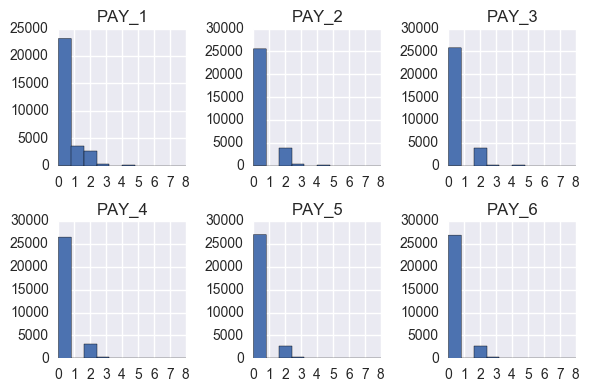

In [74]:

late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [75]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+ (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))


In [76]:
outstanding_apr=fulldata['out_bal_apr'].sum()
outstanding_may=fulldata['out_bal_may'].sum()
outstanding_june=fulldata['out_bal_june'].sum()
outstanding_july=fulldata['out_bal_july'].sum()
outstanding_aug=fulldata['out_bal_aug'].sum()


In [77]:
print outstanding_apr
print outstanding_june
print outstanding_aug

187170846.0
689776212.0
1163623815.0


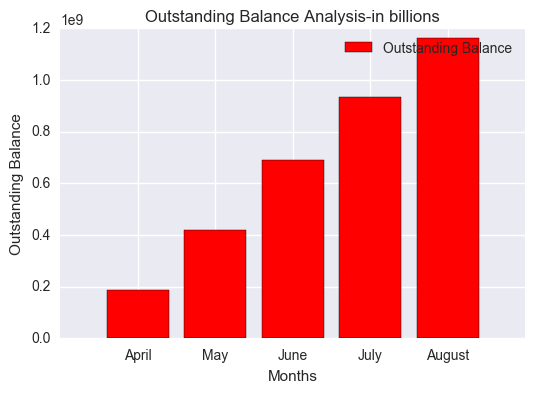

In [78]:
objects = ('April', 'May', 'June', 'July', 'August')
y_pos = np.arange(len(objects))

out_bal = [outstanding_apr,outstanding_may,outstanding_june,outstanding_july,outstanding_aug]
 
#plt.bar(y_pos-0.4,bill_amt,color='r',label="Bill Amount")
plt.bar(y_pos, out_bal,color='r',align='center', alpha=1,label="Outstanding Balance")
plt.xticks(y_pos, objects)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Outstanding Balance')
plt.title('Outstanding Balance Analysis-in billions')
 
plt.show()

In [194]:
fulldata.out_bucket.value_counts()

4    6126
5    5718
2    5642
6    4187
3    3652
7    2800
0    1154
1     665
0      56
Name: out_bucket, dtype: int64

In [198]:
fulldata['out_bucket']='0'
fulldata.out_bucket.value_counts()

0    30000
Name: out_bucket, dtype: int64

In [257]:
fulldata.loc[fulldata['out_bal_aug']<=0, 'out_bucket']=1
fulldata.loc[((fulldata['out_bal_aug']>0)&(fulldata['out_bal_aug']<1000)),'out_bucket']=2
fulldata.loc[((fulldata['out_bal_aug']>=1000)&(fulldata['out_bal_aug']<5000)),'out_bucket']=3
fulldata.loc[((fulldata['out_bal_aug']>=5000)&(fulldata['out_bal_aug']<10000)),'out_bucket']=4
fulldata.loc[((fulldata['out_bal_aug']>=10000)&(fulldata['out_bal_aug']<25000)),'out_bucket']=5
fulldata.loc[((fulldata['out_bal_aug']>=25000)&(fulldata['out_bal_aug']<50000)),'out_bucket']=6
fulldata.loc[((fulldata['out_bal_aug']>=50000)&(fulldata['out_bal_aug']<100000)),'out_bucket']=7
fulldata.loc[(fulldata['out_bal_aug']>=100000),'out_bucket']=8
fulldata.out_bucket.value_counts()

5    6126
6    5718
3    5642
7    4187
4    3652
8    2800
1    1210
2     665
Name: out_bucket, dtype: int64

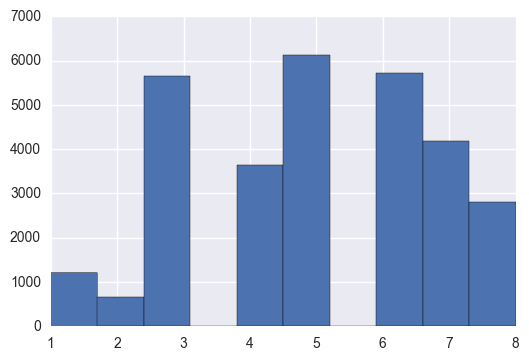

In [337]:

bins = [0,1,2,3,4,5,6,7,8]
bins_names = [1, 2, 3, 4, 5, 6,7,8]
fulldata['out_bucket2'] = pd.cut(fulldata['out_bucket'], bins, labels=bins_names)
fulldata.out_bucket2.hist()

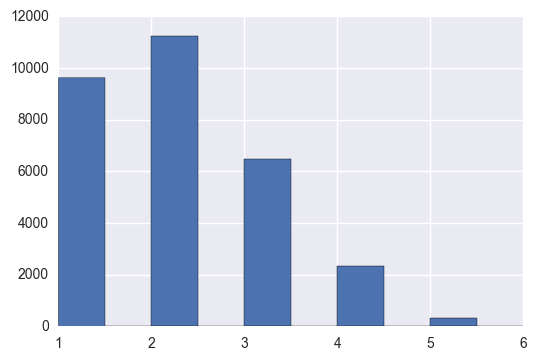

In [338]:
fulldata['AgeBin'] =0 #creates a column of 0
fulldata.loc[((fulldata['AGE'] > 20) & (fulldata['AGE'] < 30)) , 'AgeBin'] = 1
fulldata.loc[((fulldata['AGE'] >= 30) & (fulldata['AGE'] < 40)) , 'AgeBin'] = 2
fulldata.loc[((fulldata['AGE'] >= 40) & (fulldata['AGE'] < 50)) , 'AgeBin'] = 3
fulldata.loc[((fulldata['AGE'] >= 50) & (fulldata['AGE'] < 60)) , 'AgeBin'] = 4
fulldata.loc[((fulldata['AGE'] >= 60) & (fulldata['AGE'] < 70)) , 'AgeBin'] = 5
fulldata.loc[((fulldata['AGE'] >= 70) & (fulldata['AGE'] < 81)) , 'AgeBin'] = 6
fulldata.AgeBin.hist()

In [129]:
def corr_2_cols(Col1, Col2):
    res = fulldata.groupby([Col1, Col2]).size().unstack()
    #res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [272]:

corr_2_cols('out_bucket','AgeBin')


AgeBin,1,2,3,4,5,6
out_bucket,,,,,,
1,325.0,485.0,276.0,93.0,28.0,3.0
2,223.0,274.0,125.0,37.0,6.0,NaN
3,1934.0,1886.0,1231.0,525.0,63.0,3.0
4,1288.0,1308.0,734.0,284.0,37.0,1.0
5,2134.0,2288.0,1232.0,413.0,54.0,5.0
6,1900.0,2110.0,1205.0,440.0,59.0,4.0
7,1208.0,1691.0,927.0,317.0,37.0,7.0
8,606.0,1196.0,734.0,232.0,30.0,2.0


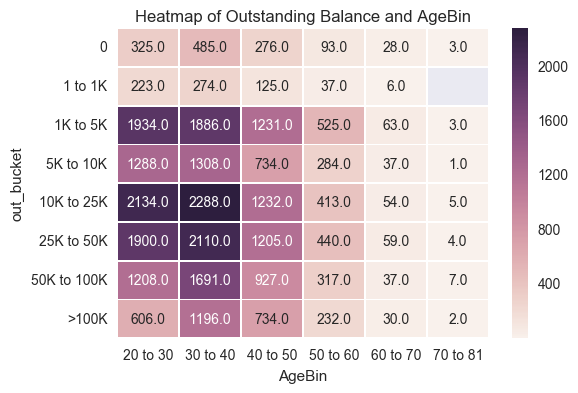

In [285]:
lab=['20 to 30','30 to 40','40 to 50','50 to 60','60 to 70','70 to 81']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'AgeBin')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2,, linewidths=.5)
r.set_title("Heatmap of Outstanding Balance and AgeBin")

In [286]:
corr_2_cols('out_bucket','EDUCATION')

EDUCATION,1,2,3,4
out_bucket,,,,
1,571,441,183,15
2,263,307,88,7
3,1793,2745,1063,41
4,1219,1730,656,47
5,2183,2896,961,86
6,1858,2806,959,95
7,1534,1933,643,77
8,1164,1172,364,100


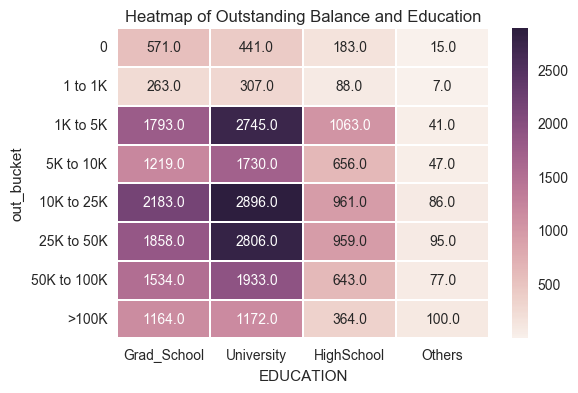

In [287]:
lab=['Grad_School','University','HighSchool','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'EDUCATION')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Education")

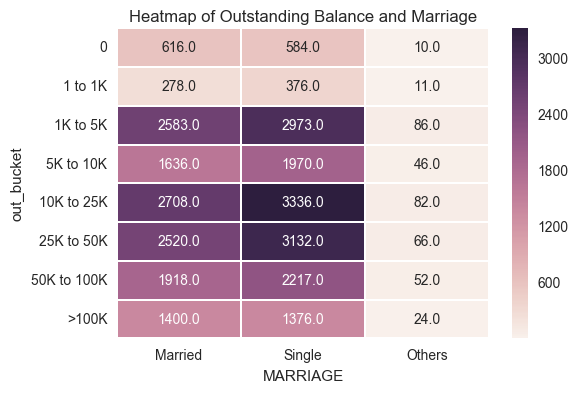

In [289]:
lab=['Married','Single','Others']
lab2=['0','1 to 1K','1K to 5K','5K to 10K','10K to 25K','25K to 50K','50K to 100K','>100K']
age_outstanding=corr_2_cols('out_bucket', 'MARRIAGE')
r=sns.heatmap(age_outstanding,annot=True,fmt="0.1f",xticklabels=lab,yticklabels=lab2, linewidths=.8)
r.set_title("Heatmap of Outstanding Balance and Marriage")

In [330]:
df=pd.DataFrame(fulldata,columns=['out_bal_aug','AGE','EDUCATION','MARRIAGE','LIMIT_BAL'])
df.head()

,out_bal_aug,AGE,EDUCATION,MARRIAGE,LIMIT_BAL
1,4602,24,2,1,20000
2,2421,26,2,2,120000
3,19708,34,2,2,90000
4,24831,37,2,1,50000
5,47856,57,2,1,50000


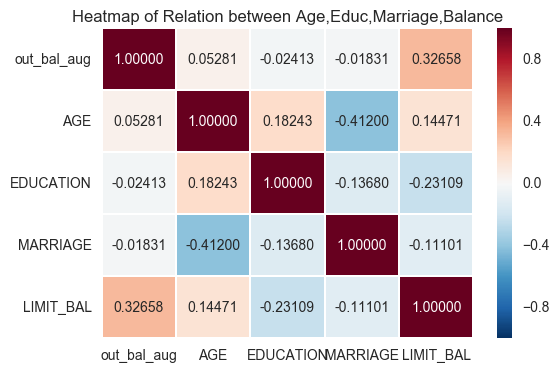

In [333]:
cor = df.corr()
r=sns.heatmap(cor,annot=True,fmt="0.5f",xticklabels=cor.columns.values,yticklabels=cor.columns.values, linewidths=.8)
r.set_title("Heatmap of Relation between Age,Educ,Marriage,Balance")

In [334]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER,out_bal_apr,out_bal_may,out_bal_june,out_bal_july,out_bal_aug,out_bucket,out_bucket2,AgeBin,BILL_PAY_RATIO1,BILL_PAY_RATIO2,BILL_PAY_RATIO3,BILL_PAY_RATIO4,BILL_PAY_RATIO5,BILL_PAY_RATIO6
1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,689,3791,4602,3,3,1,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,194,1011,1421,1464,2421,3,3,1,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,399,782,1010,2978,19708,5,5,2,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,481,936,23113,24074,24831,5,5,2,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,704,11498,36393,42909,47856,6,6,4,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040
